In [32]:
import os
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
from utils.paths import find, list_subdirs

In [37]:
import shutil
import tqdm

In [34]:
full_video_directory = '/home/niell_lab/data/jumping/full_videos'

In [35]:
split_video_directory = '/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721'

In [40]:
for fullvid_json in find('*fm_eyecameracalc_props.json', full_video_directory):
    animal, mouse, eye = os.path.split(fullvid_json)[1].split('_')[:3]
    eye = eye[-4:]
    for jumpdir in list_subdirs(split_video_directory):
        if animal in jumpdir and mouse in jumpdir:
            savepath = os.path.join(*[split_video_directory, jumpdir, os.path.split(fullvid_json)[1]])
            shutil.copy(fullvid_json, savepath)

In [5]:
fullvid = '/home/niell_lab/data/jumping/full_videos/071520/PV-CHR11P2RT/eyecams/071520_PV-CHR11P2RT_eyecamsREYE_fm_eyecameracalc_props.json'

In [27]:
animal, mouse, eye = os.path.split(fullvid)[1].split('_')[:3]
eye = eye[-4:]
for jumpdir in list_subdirs(split_video_directory):
    if animal in jumpdir and mouse in jumpdir:
        print(jumpdir)

071520_PV-CHR11P2RT_001
071520_PV-CHR11P2RT_009
071520_PV-CHR11P2RT_006
071520_PV-CHR11P2RT_005
071520_PV-CHR11P2RT_007
071520_PV-CHR11P2RT_008
071520_PV-CHR11P2RT_003
071520_PV-CHR11P2RT_010
071520_PV-CHR11P2RT_002
071520_PV-CHR11P2RT_004


In [41]:
import xarray as xr
data = xr.open_dataset('/home/niell_lab/data/jumping/timebin_eyecams_2sec_091721/071420_PV-CHR11P1LT_001/071420_PV-CHR11P1LT_001_LEYE.nc')
data

<xarray.Dataset>
Dimensions:              (ellipse_params: 7, frame: 582, height: 120, point_loc: 30, width: 160)
Coordinates:
  * frame                (frame) int64 0 1 2 3 4 5 6 ... 576 577 578 579 580 581
  * point_loc            (point_loc) object 'pt1_x' ... 'outer_likelihood'
    timestamps           (frame) float64 ...
  * ellipse_params       (ellipse_params) object 'theta' 'phi' ... 'ellipse_phi'
Dimensions without coordinates: height, width
Data variables:
    LEYE_pts             (frame, point_loc) float64 ...
    LEYE_ellipse_params  (frame, ellipse_params) float64 ...
    LEYE_video           (frame, height, width) int8 ...

In [43]:
import matplotlib.pyplot as plt

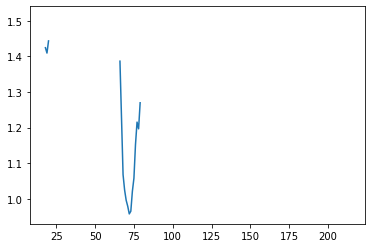

In [44]:
plt.plot(data.LEYE_ellipse_params.sel(ellipse_params='theta'))